In [ ]:
from google.colab import files
import os
import zipfile

files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
import kaggle
print("Imported kaggle API successfully !")

Saving kaggle.json to kaggle.json
Imported kaggle API successfully !


In [ ]:
print("Downloading dataset : ")
!kaggle datasets download subirbiswas19/skin-disease-dataset
print("Downloaded Successfully!")

Dataset URL: https://www.kaggle.com/datasets/subirbiswas19/skin-disease-dataset
License(s): CC0-1.0
 69% 12.0M/17.3M [00:00<00:00, 62.6MB/s]
100% 17.3M/17.3M [00:00<00:00, 66.2MB/s]
Downloaded Successfully!


In [ ]:
zip_ref = zipfile.ZipFile('/content/skin-disease-dataset.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.layers import BatchNormalization
# Instead of 'from keras_preprocessing import image', use the following:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir="/content/skin-disease-datasaet/train_set"
generator = ImageDataGenerator()
train_ds = generator.flow_from_directory(train_dir,target_size=(150, 150),batch_size=64)
classes = list(train_ds.class_indices.keys())

Found 924 images belonging to 8 classes.


Classes: ['PA-cutaneous-larva-migrans', 'FU-ringworm', 'BA-impetigo', 'BA- cellulitis', 'FU-athlete-foot', 'VI-shingles', 'VI-chickenpox', 'FU-nail-fungus']


<ipython-input-6-c2e772129539>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_counts["Class"], y=df_counts["Count"], palette="viridis")


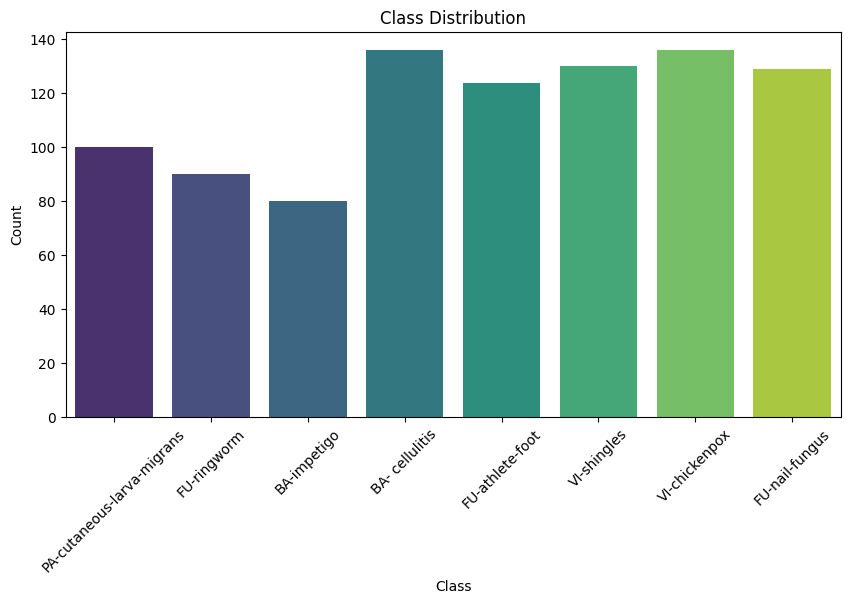

In [ ]:
# List all class folders
dataset_path="/content/skin-disease-datasaet/train_set"
classes = os.listdir(dataset_path)
print("Classes:", classes)

# Count images per class
class_counts = {cls: len(os.listdir(os.path.join(dataset_path, cls))) for cls in classes}
df_counts = pd.DataFrame(list(class_counts.items()), columns=["Class", "Count"])

# Plot class distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=df_counts["Class"], y=df_counts["Count"], palette="viridis")
plt.xticks(rotation=45)
plt.title("Class Distribution")
plt.show()


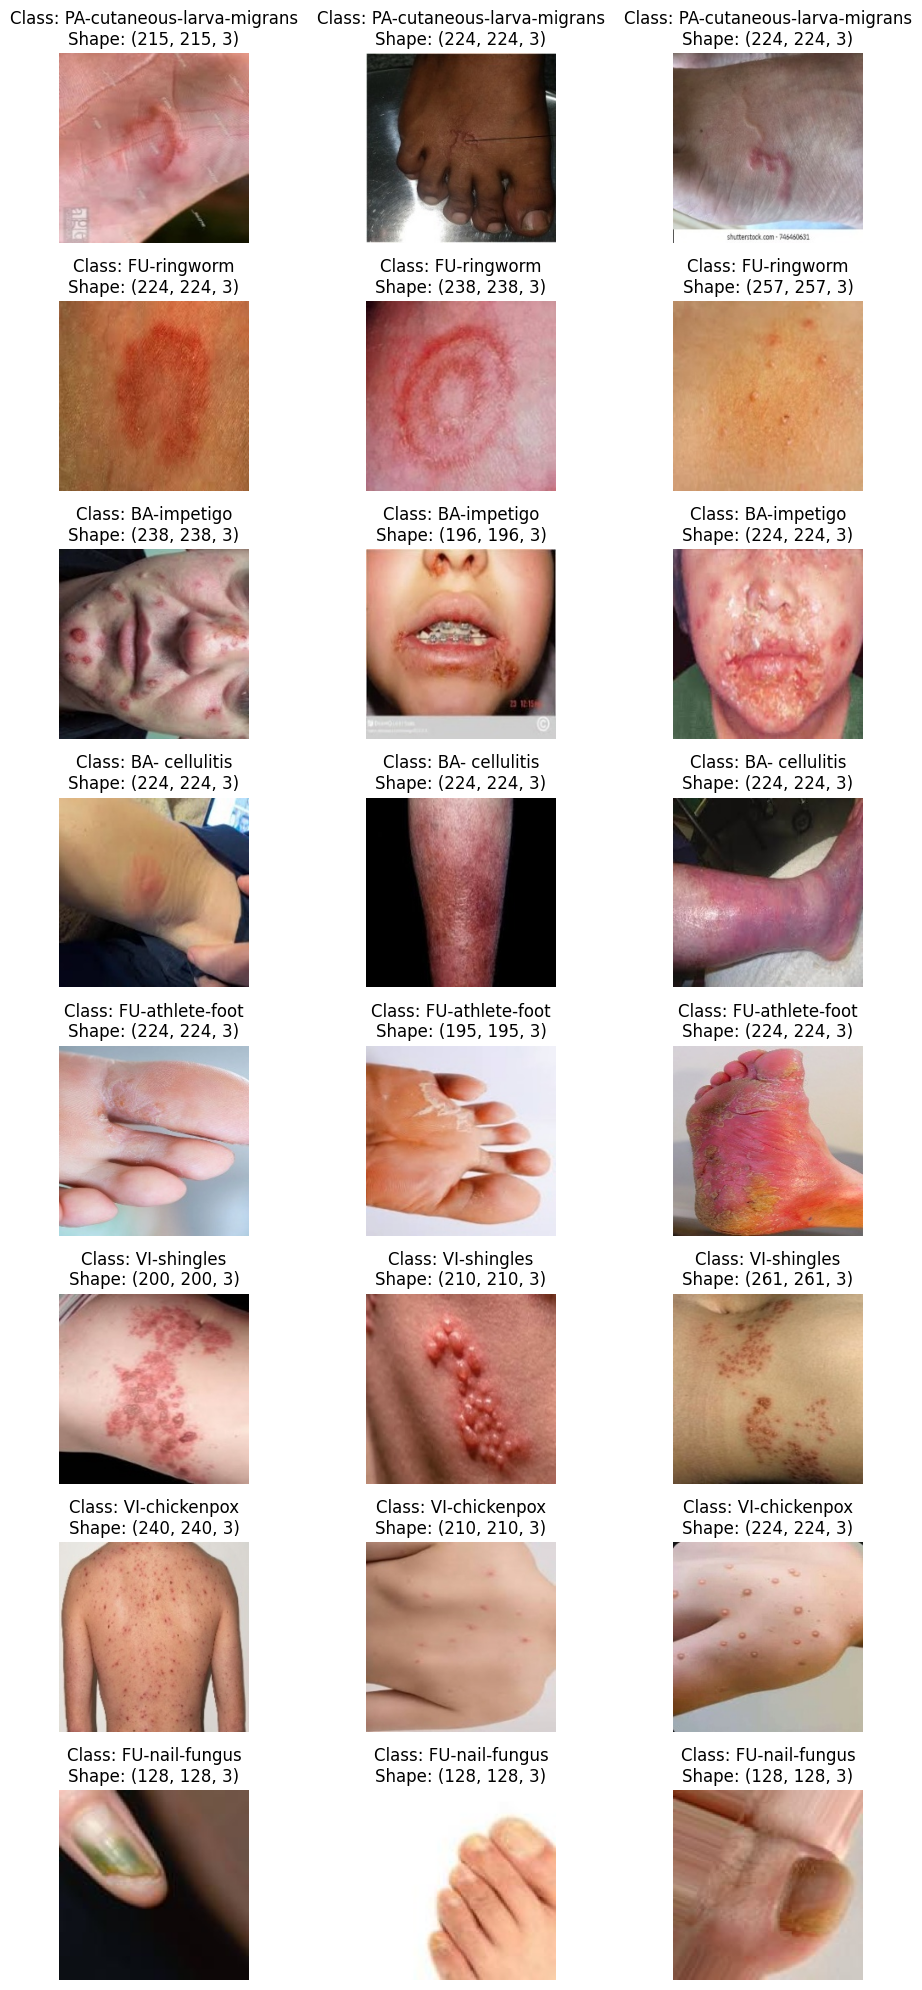

In [ ]:
import cv2
from PIL import Image
from tensorflow.keras import models, layers, optimizers, losses, metrics
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import os
from pathlib import Path
import random

# visualize some images from our training set.
NUM_IMAGES = 3

fig, ax = plt.subplots(nrows = len(classes), ncols = NUM_IMAGES, figsize = (10, 20))

p = 0

for c in classes:
    img_path_class = list(Path(os.path.join(train_dir,c)).glob("*.jpg"))
    img_selected = random.choices(img_path_class, k = NUM_IMAGES)
    for i,j in enumerate(img_selected):
        img_bgr = cv2.imread(str(j))
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
        ax[p,i].imshow(img_rgb)
        ax[p,i].set_title(f"Class: {c}\nShape: {img_rgb.shape}")
        ax[p,i].axis('off')

    p += 1

fig.tight_layout()
fig.show()

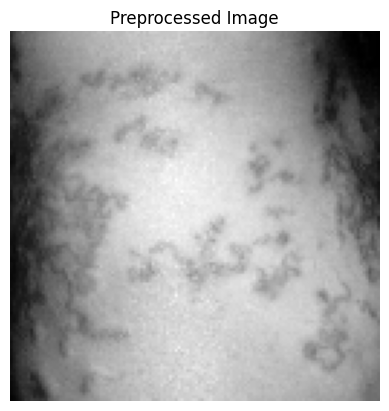

In [ ]:
def preprocess_image(image_path, img_size=128, grayscale=False):
    img = cv2.imread(image_path)

    if grayscale:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
        img = np.expand_dims(img, axis=-1)  # Add channel dimension for CNNs

    img = cv2.resize(img, (img_size, img_size))  # Resize image
    img = img / 255.0  # Normalize (scale values between 0 and 1)
    return img

# Example usage
img_path = os.path.join(dataset_path, classes[0], os.listdir(os.path.join(dataset_path, classes[0]))[0])
preprocessed_img = preprocess_image(img_path, grayscale=True)

plt.imshow(preprocessed_img.squeeze(), cmap="gray")
plt.axis("off")
plt.title("Preprocessed Image")
plt.show()


Image Shape: (224, 224)
Pixel Intensities:
[[ 29  31  30 ... 124 127 131]
 [  8  10   9 ... 122 126 129]
 [ 12  13  12 ... 118 122 125]
 ...
 [ 10  11  10 ... 149 150 151]
 [  8   9   9 ... 150 155 158]
 [ 28  29  29 ... 157 160 161]]


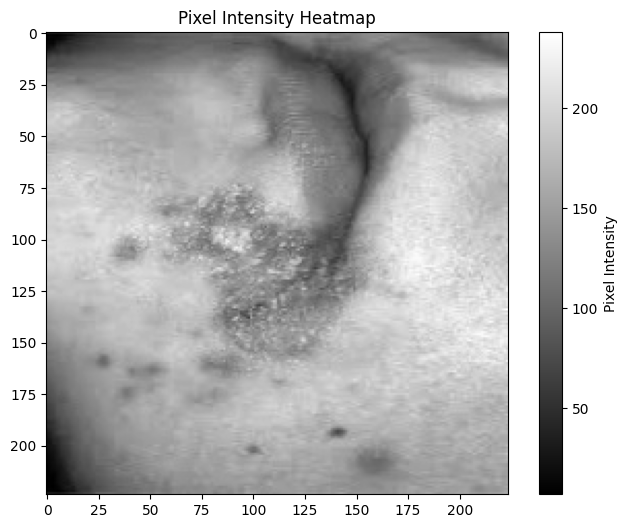

In [ ]:
# Read image in grayscale
image_path="/content/skin-disease-datasaet/test_set/BA-impetigo/31_BA-impetigo (26).jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Convert image to NumPy array
pixel_values = np.array(image)

# Print shape of the image
print(f"Image Shape: {pixel_values.shape}")  # Example: (128, 128) for grayscale

# Display raw pixel values
print("Pixel Intensities:")
print(pixel_values)
plt.figure(figsize=(8,6))
plt.imshow(pixel_values, cmap="gray")
plt.colorbar(label="Pixel Intensity")
plt.title("Pixel Intensity Heatmap")
plt.show()

In [ ]:
x, y = 50, 50  # Example coordinates

# Get pixel intensity at (x, y)
pixel_intensity = pixel_values[y, x]
print(f"Pixel Intensity at ({x}, {y}): {pixel_intensity}")

Pixel Intensity at (50, 50): 159


In [ ]:
# Load image in color mode
image_rgb = cv2.imread(image_path)

# Convert to RGB format
image_rgb = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB)

# Extract pixel at (x, y)
pixel_rgb = image_rgb[y, x]  # [R, G, B]
print(f"RGB Pixel at ({x}, {y}): {pixel_rgb}")

RGB Pixel at (50, 50): [212 139 120]


Text(0.5, 1.0, 'athlete-foot')

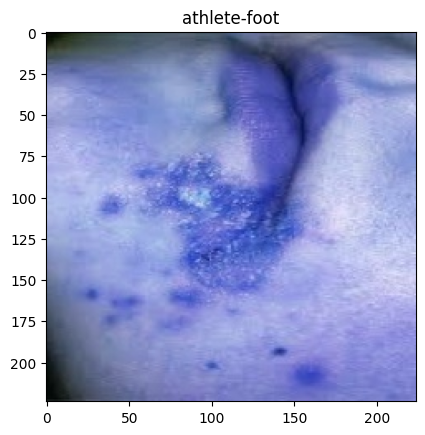

In [ ]:
img = cv2.imread('/content/skin-disease-datasaet/test_set/BA-impetigo/31_BA-impetigo (26).jpg')
plt.imshow(img)
plt.title('athlete-foot')

Text(0.5, 1.0, 'Red Channel')

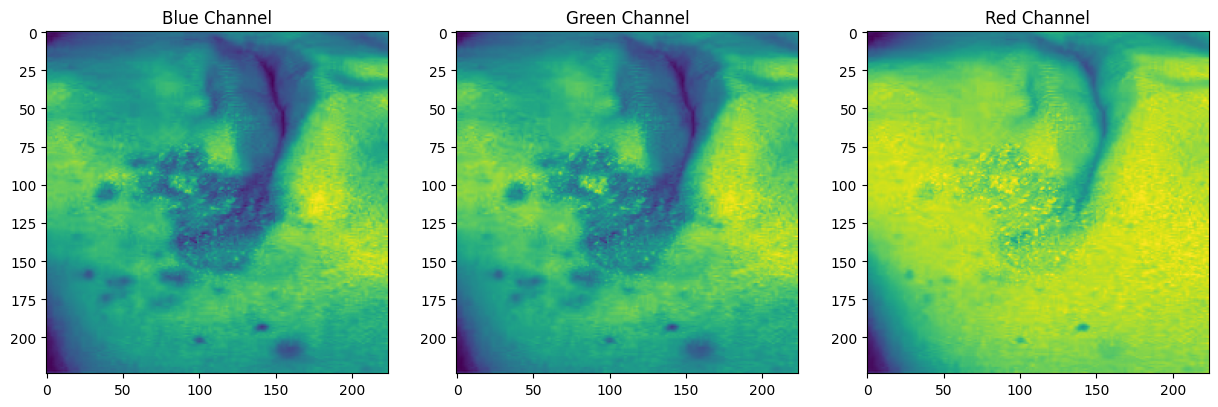

In [ ]:
plt.figure(figsize = (15, 15))
b, g, r = cv2.split(img)

plt.subplot(1,3,1)
plt.imshow(b)
plt.title("Blue Channel")

plt.subplot(1,3,2)
plt.imshow(g)
plt.title("Green Channel")

plt.subplot(1,3,3)
plt.imshow(r)
plt.title("Red Channel")

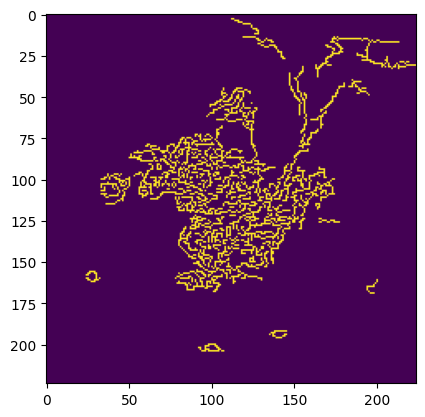

In [ ]:
canny = cv2.Canny(img, 50, 170)
plt.imshow(canny)

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(len(classes),activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ["accuracy"])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 74, 74, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 36, 36, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 17, 17, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 96)          │          55,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 96)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 7, 7, 96)            │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 5, 5, 32)            │          27,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 2, 2, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │           1,0

 Total params: 158,088 (617.53 KB)

 Trainable params: 157,512 (615.28 KB)

 Non-trainable params: 576 (2.25 KB)

In [ ]:
history = model.fit(train_ds,epochs= 15, batch_size=64)

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 16s 401ms/step - accuracy: 0.2431 - loss: 2.0555
Epoch 2/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.4799 - loss: 1.4558
Epoch 3/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.6318 - loss: 1.1189
Epoch 4/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.7144 - loss: 0.8778
Epoch 5/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.7766 - loss: 0.7088
Epoch 6/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.8092 - loss: 0.6066
Epoch 7/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.8787 - loss: 0.4471
Epoch 8/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.8941 - loss: 0.3702
Epoch 9/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.9143 - loss: 0.2921
Epoch 10/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.9575 - loss: 0.2231
Epoch 11/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.9765 - loss: 0.1523
Epoch 12/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.9683 

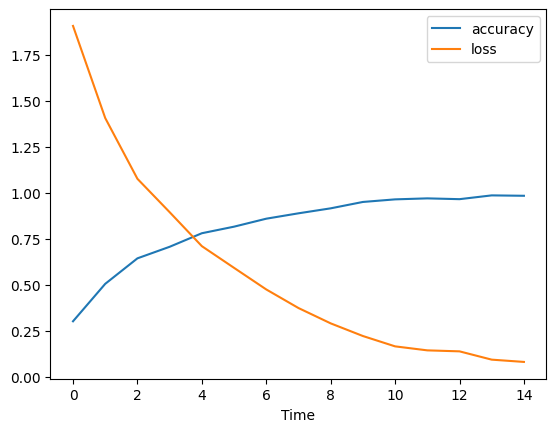

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.xlabel('Time')
plt.legend(['accuracy', 'loss'])
plt.show()

In [ ]:
import warnings
warnings.filterwarnings('ignore')
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

model.save('skindisease.h5')

In [ ]:
from tensorflow.keras.models import load_model # load saved model
model = load_model('skindisease.h5')

In [ ]:
def predict_image(img_path):
    # Load and preprocess the image
    img = load_img(img_path, target_size=(192, 108))
    plt.imshow(img)
    plt.show()
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions for model input shape
    # Make a prediction
    prediction = model.predict([img_array, img_array, img_array])  # As the model has 3 inputs
    predicted_class = np.argmax(predictions, axis=1)
    # Map the predicted class index to the respective class
    class_map = ['BA- cellulitis','BA-impetigo','FU-athlete-foot','FU-nail-fungus','FU-ringworm','PA-cutaneous-larva-migrans','VI-chickenpox','VI-shingles']
    return class_map[predicted_class[0]]

In [ ]:
# Test with a set of provided images
image_directory = "/content/skin-disease-datasaet/test_set/"
image_files = os.listdir(image_directory)

In [ ]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import matplotlib.pyplot as plt
import numpy as np

def predict_image(img_path):
    # Load and preprocess the image
    img = load_img(img_path, target_size=(192, 108)) # load_img is now defined
    plt.imshow(img)
    plt.show()
    img_array = img_to_array(img) # img_to_array is now defined
    img_array = img_array / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions for model input shape
    # Make a prediction
    prediction = model.predict([img_array, img_array, img_array])  # As the model has 3 inputs
    # Assuming 'predictions' is the correct variable
    predicted_class = np.argmax(prediction, axis=1) # Now predicting on the correct data
    # Map the predicted class index to the respective class
    class_map = ['BA- cellulitis','BA-impetigo','FU-athlete-foot','FU-nail-fungus','FU-ringworm','PA-cutaneous-larva-migrans','VI-chickenpox','VI-shingles']
    return class_map[predicted_class[0]]
    print("Actual: "+(image_path.split("/")[-1]).split("_")[0])
    print("Predicted: "+classes[np.argmax(prediction)])
    predicted_class = classes[np.argmax(prediction)]
    print(np.argmax(prediction))
    print(predict)

In [ ]:
import json

In [ ]:
# Mock database for skin diseases
data  = {
    "BA-cellulitis": {
        "causes": [
            "Bacterial infection (commonly Streptococcus or Staphylococcus)",
            "Injuries that break the skin, such as cuts or scrapes",
            "Weakened immune system"
        ],
        "symptoms": [
            "Red, swollen, and tender skin",
            "Warmth in the affected area",
            "Fever and chills in severe cases"
        ],
        "remedies": [
            "Antibiotic treatment (oral or intravenous)",
            "Keep the affected area elevated",
            "Consult a doctor for proper care"
        ]
    },
    "BA-impetigo": {
        "causes": [
            "Bacterial infection (Staphylococcus aureus or Streptococcus pyogenes)",
            "Direct contact with infected skin",
            "Poor hygiene"
        ],
        "symptoms": [
            "Red sores around the nose and mouth",
            "Honey-colored crusts after sores burst",
            "Itching and irritation"
        ],
        "remedies": [
            "Topical or oral antibiotics",
            "Gently clean affected areas with soap and water",
            "Avoid sharing personal items like towels"
        ]
    },
    "FU-athlete-foot": {
        "causes": [
            "Fungal infection (Trichophyton species)",
            "Walking barefoot in damp, communal areas like pools or gyms",
            "Wearing tight, damp footwear"
        ],
        "symptoms": [
            "Itching, burning, or stinging between toes",
            "Scaly, cracked, or peeling skin",
            "Blisters or sores"
        ],
        "remedies": [
            "Over-the-counter antifungal creams or sprays",
            "Keep feet clean and dry",
            "Wear breathable footwear and avoid sharing shoes"
        ]
    },
    "FU-nail-fungus": {
        "causes": [
            "Fungal infection (Dermatophytes, yeasts, or molds)",
            "Prolonged exposure to moist environments",
            "Weakened immune system"
        ],
        "symptoms": [
            "Thickened, brittle, or discolored nails",
            "Nails may crumble or separate from the nail bed",
            "Unpleasant odor"
        ],
        "remedies": [
            "Antifungal nail treatments (topical or oral)",
            "Keep nails trimmed and clean",
            "Consult a dermatologist for advanced cases"
        ]
    },
    "FU-ringworm": {
        "causes": [
            "Fungal infection (Dermatophytes)",
            "Direct contact with infected individuals or animals",
            "Sharing contaminated items like towels or clothing"
        ],
        "symptoms": [
            "Circular, red, scaly patches",
            "Itchy skin",
            "Raised edges around the affected area"
        ],
        "remedies": [
            "Topical antifungal creams or ointments",
            "Avoid scratching to prevent spreading",
            "Clean affected areas regularly"
        ]
    },
    "PA-cutaneous-larva-migrans": {
        "causes": [
            "Larval stage of hookworms penetrating the skin",
            "Walking barefoot on contaminated soil or sand",
            "Contact with infected animal feces"
        ],
"symptoms": [
            "Winding, snake-like red lesions",
            "Itching and irritation",
            "Mild swelling in affected areas"
        ],
        "remedies": [
            "Antiparasitic medications (e.g., albendazole, ivermectin)",
            "Topical corticosteroids to relieve itching",
            "Avoid walking barefoot in areas prone to contamination"
        ]
    },
    "VI-chickenpox": {
        "causes": [
            "Varicella-zoster virus (VZV)",
            "Highly contagious through respiratory droplets or direct contact",
            "Weakened immune system increases risk"
        ],
        "symptoms": [
            "Itchy rash with fluid-filled blisters",
            "Fever and fatigue",
            "Headache and loss of appetite"
        ],
        "remedies": [
            "Calamine lotion to soothe itching",
            "Antiviral medications in severe cases",
            "Avoid scratching to prevent scarring"
        ]
    },
    "VI-shingles": {
        "causes": [
            "Reactivation of varicella-zoster virus (VZV)",
            "Stress, aging, or weakened immune system",
            "Previous history of chickenpox"
        ],
        "symptoms": [
            "Painful rash with blisters",
            "Burning, tingling, or numbness",
            "Fever and headache"
        ],
        "remedies": [
            "Antiviral medications (acyclovir, valacyclovir)",
            "Pain relievers for discomfort",
            "Cool compresses on the rash"
        ]
    }
}
json_data = json.dumps(data, indent=4)  # Pretty-printed JSON string
print(json_data)

{
    "BA-cellulitis": {
        "causes": [
            "Bacterial infection (commonly Streptococcus or Staphylococcus)",
            "Injuries that break the skin, such as cuts or scrapes",
            "Weakened immune system"
        ],
        "symptoms": [
            "Red, swollen, and tender skin",
            "Warmth in the affected area",
            "Fever and chills in severe cases"
        ],
        "remedies": [
            "Antibiotic treatment (oral or intravenous)",
            "Keep the affected area elevated",
            "Consult a doctor for proper care"
        ]
    },
    "BA-impetigo": {
        "causes": [
            "Bacterial infection (Staphylococcus aureus or Streptococcus pyogenes)",
            "Direct contact with infected skin",
            "Poor hygiene"
        ],
        "symptoms": [
            "Red sores around the nose and mouth",
            "Honey-colored crusts after sores burst",
            "Itching and irritation"
        ],
        "reme

In [ ]:
# Save JSON to a file in Google Colab
with open("skin_diseases.json", "w") as json_file:
    json.dump(data, json_file, indent=4)
print("JSON file saved!")

JSON file saved!


In [ ]:
# Load JSON data from a file
with open("skin_diseases.json", "r") as json_file:
    loaded_data = json.load(json_file)

print("Loaded JSON data:")
print(loaded_data)

Loaded JSON data:
{'BA-cellulitis': {'causes': ['Bacterial infection (commonly Streptococcus or Staphylococcus)', 'Injuries that break the skin, such as cuts or scrapes', 'Weakened immune system'], 'symptoms': ['Red, swollen, and tender skin', 'Warmth in the affected area', 'Fever and chills in severe cases'], 'remedies': ['Antibiotic treatment (oral or intravenous)', 'Keep the affected area elevated', 'Consult a doctor for proper care']}, 'BA-impetigo': {'causes': ['Bacterial infection (Staphylococcus aureus or Streptococcus pyogenes)', 'Direct contact with infected skin', 'Poor hygiene'], 'symptoms': ['Red sores around the nose and mouth', 'Honey-colored crusts after sores burst', 'Itching and irritation'], 'remedies': ['Topical or oral antibiotics', 'Gently clean affected areas with soap and water', 'Avoid sharing personal items like towels']}, 'FU-athlete-foot': {'causes': ['Fungal infection (Trichophyton species)', 'Walking barefoot in damp, communal areas like pools or gyms', 'We

In [ ]:
print(loaded_data.keys())  # Check all available keys

dict_keys(['BA-cellulitis', 'BA-impetigo', 'FU-athlete-foot', 'FU-nail-fungus', 'FU-ringworm', 'PA-cutaneous-larva-migrans', 'VI-chickenpox', 'VI-shingles'])


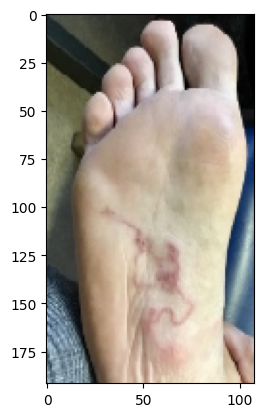

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Causes of PA-cutaneous-larva-migrans: ['Larval stage of hookworms penetrating the skin', 'Walking barefoot on contaminated soil or sand', 'Contact with infected animal feces']
Symptoms of PA-cutaneous-larva-migrans: ['Winding, snake-like red lesions', 'Itching and irritation', 'Mild swelling in affected areas']
Remedies of PA-cutaneous-larva-migrans: ['Antiparasitic medications (e.g., albendazole, ivermectin)', 'Topical corticosteroids to relieve itching', 'Avoid walking barefoot in areas prone to contamination']


In [ ]:
disease= predict_image("/content/skin-disease-datasaet/test_set/PA-cutaneous-larva-migrans/111_PA-cutaneous-larva-migrans (19).jpg")
causes = loaded_data[disease]["causes"]
symptoms = loaded_data[disease]["symptoms"]
remedies = loaded_data[disease]["remedies"]
print(f"Causes of {disease}: {causes}")
print(f"Symptoms of {disease}: {symptoms}")
print(f"Remedies of {disease}: {remedies}")

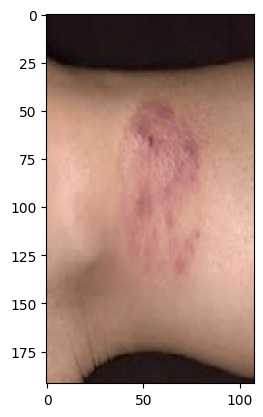

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted Disease: 'BA- cellulitis'
Causes of BA- cellulitis: None
Symptoms of BA- cellulitis: None
Remedies of BA- cellulitis: None


In [ ]:
disease=predict_image("/content/skin-disease-datasaet/test_set/FU-ringworm/94_FU-ringworm (48).jpg")
# Strip extra spaces to ensure key matching
disease = disease.strip()
print(f"Predicted Disease: '{disease}'")
# Attempt to get data for the disease, if not found provide a default message
disease_data = loaded_data.get(disease, {})
causes = disease_data.get("causes")
symptoms = disease_data.get("symptoms")
remedies = disease_data.get("remedies")
print(f"Causes of {disease}: {causes}")
print(f"Symptoms of {disease}: {symptoms}")
print(f"Remedies of {disease}: {remedies}")

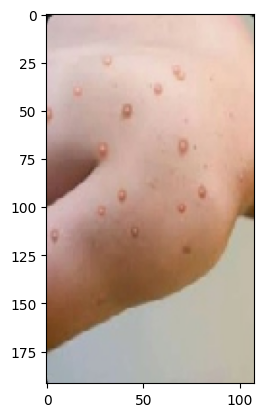

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted Disease: 'BA- cellulitis'
Causes of BA- cellulitis: None
Symptoms of BA- cellulitis: None
Remedies of BA- cellulitis: None


In [ ]:
disease=predict_image("/content/skin-disease-datasaet/test_set/VI-chickenpox/122_VI-chickenpox (7).jpg")
# Strip extra spaces to ensure key matching
disease = disease.strip()
print(f"Predicted Disease: '{disease}'")
# Attempt to get data for the disease, if not found provide a default message
disease_data = loaded_data.get(disease, {})
causes = disease_data.get("causes")
symptoms = disease_data.get("symptoms")
remedies = disease_data.get("remedies")
print(f"Causes of {disease}: {causes}")
print(f"Symptoms of {disease}: {symptoms}")
print(f"Remedies of {disease}: {remedies}")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
